# Name Evaluation

This document evaluates a list of American names published by the Social Security Administration.

[SSA data taken from here](https://rstudio-pubs-static.s3.amazonaws.com/24678_8234c801b4134f2cb32d8077f6cd75a2.html). Phonetic dictionary from CMU Sphinx project.

In [1]:
# Names taken out of consideration

family_names = {
    'Robert', 'Bob', 'Paula', 'Teo', 'Hannah', 'Andrew',
    'Andy', 'Rylan', 'Jacob', 'Martha', 'Neil', 'Carol', 'Sandy',
    'Leslie', 'Joel', 'Noah', 'Isaac', 'Benjamin', 'Ben',    
}

friend_names = {
    'Kevin', 'Sabrina', 'Pete', 'Peter', 'Sarahana', 'Andy',
    
    'Malika', 'Canaan', 'Max', 'Ellis', 'Brandon', 'Oliver', 'Polly', 'Bilal',
}

colleague_names = {
    'Anna', 'Jaime', 'Ian', 'Sufian', 'Vedant', 'Olivier', 'Raz', 'Jenna',
    'Whitney', 'Rachel', 'Jon', 'John', 'Racine', 'Rocio', 'Jason', 'Simon',
    'Fiona', 'Renaud', 'Aaron', 'Sam', 'Samantha', 'Michael', 'Allan', 'Cal',
    'Stewart' 'Ahmed', 'Arpita', 'Jonathan', 'Milo', 'Cy', 'Hera', 'Renaud',
    'Christopher', 'Daniel', 'Stan', 'Gio', 'Anders', 'Avi', 'Lara', 'Moishe',
    'Gregg', 'Stefan'
}

famous_people = {
    'Adolf', 'Adolph', 'Donald',
    'Barack', 'Bill',
    'Michaelangelo', 'Leonardo', 'Splinter', 'Shredder', 'Krang',
    'Lucille', 'Jesus', 'Jean Luc', 'William', 'Harry', 'Geordi',
    'Ayn', 'Tupac', 'Oprah', 'Vader', 'Kermit',
}

other_names = {
    'Uber', 'Nacho', 'Avis', 'Ryker', 'Jude', 'Judah', 'Jihad', 'Gaza', 'Jesus', 'Moses', 'Mohammad'
}

block_list = {
    'Ray',          # Neighbor's kid's name. Would be awkward.
}.union(family_names, friend_names, colleague_names, famous_people, other_names)

cool_names = {
    'Mia',
    'Leidy',
    'Chess',
    'Key',
    'Less',
    'Vella',
    'Ekco',
    'Echo',
    'Twig'
    'Del',
    'Eloy',
    'Helix',
    'Ada',
    'Luma',
    'Lua',
    'Elia',
    'Arthur',
    'Tron',
    'Alice',
    'Rita',
    'June',
    'Lina',
    'Amelia',
    'Regan',
    'Kermit',
    'Melchizedek',
}

In [2]:
# Get the list of all SSA year of birth files
from os import listdir
from os.path import isfile, join
yob_file_list = [f for f in listdir("ssa") if isfile(join("ssa", f)) and f.startswith("yob")]

# Load them into an in-memory data structure
import csv
year_name_frequency = {}
gender_year_name_frequency = {}
gender_year_name_frequency['M'] = {}
gender_year_name_frequency['F'] = {}
for file_name in yob_file_list:
    year = int(file_name[3:7])
    year_name_frequency[year] = {}
    gender_year_name_frequency['M'][year] = {}
    gender_year_name_frequency['F'][year] = {}
    with open(join("ssa", file_name)) as content:
        csvReader = csv.reader(content)
        for row in csvReader:
            year_name_frequency[year][row[0]] = year_name_frequency[year].get(row[0], 0) + int(row[2])
            gender_year_name_frequency[row[1]][year][row[0]] = int(row[2])

In [3]:
# Get an all-time frequency map 
name_frequency = {};
for year in year_name_frequency.keys():
    for name in year_name_frequency[year].keys():
        name_frequency[name] = name_frequency.get(name, 0) + year_name_frequency[year][name]
sorted_name_frequency = sorted(name_frequency.items(), key=lambda kv: kv[1])[::-1]

gender_name_frequency = { 'M': {}, 'F': {} }
for gender in gender_year_name_frequency.keys():
    for year in gender_year_name_frequency[gender].keys():
        for name in gender_year_name_frequency[gender][year].keys():
            gender_name_frequency[gender][name] = gender_name_frequency[gender].get(name, 0) + gender_year_name_frequency[gender][year][name]

# Get a frequency rank overall
name_rank = {};
i = 0
for pair in sorted_name_frequency:
    name_rank[pair[0]] = i
    i = i + 1

In [4]:
# Creat a map from name to a graph of frequency by year
name_year_frequency = {};
for year in year_name_frequency:
    for name in year_name_frequency[year]:
        if name not in name_year_frequency:
            name_year_frequency[name] = {}
        name_year_frequency[name][year] = year_name_frequency[year][name]

In [5]:
import re
from random import shuffle
import textwrap

# Read the dictionary
phonetic_dictionary = {}
with open("cmudict/cmudict.dict") as file:
    for line in file:
       list = line.split('#')[0].split()
       phonetic_dictionary[str(list[0])] = list[1::]

In [6]:
# Read a dictionary of english words
# Words from https://github.com/adrielklein/scrabble-word-finder
english_dictionary = set()
with open("twl06.txt") as file:
    for line in file:
       english_dictionary.add(line.strip())

In [7]:
# Map names to their phonetic length
name_length = {}
for name in name_frequency:
    if name.lower() in phonetic_dictionary:
        name_length[name] = len(phonetic_dictionary[name.lower()])

sorted_name_length = sorted(name_length.items(), key=lambda kv: kv[1])[::-1]
sorted_name_length[:5]

[('Constantinos', 12),
 ('Quetzalcoatl', 11),
 ('Serendipity', 11),
 ('Independence', 11),
 ('Kristofferson', 11)]

In [8]:
# Normalize a name by it's pronunciation
def normalize_pronunciation(name):
    if name.lower() in phonetic_dictionary:
        return "-".join(phonetic_dictionary[name.lower()])
    return "-"

# Map a normalized name to its homonyms
name_homonyms = {}
for name in name_frequency:
    normal = normalize_pronunciation(name)
    if normal not in name_homonyms:
        name_homonyms[normal] = [];
    name_homonyms[normal].append(name)

# Names with most homonyms
sorted_name_homonym_count = sorted(name_homonyms.items(), key=lambda kv: len(kv[1]))[::-1]
sorted_name_homonym_count[1::][:2]

[('L-AO1-R-IY0',
  ['Laurie',
   'Lori',
   'Lorrie',
   'Lorie',
   'Laury',
   'Lory',
   'Lorry',
   'Lauri',
   'Lorey',
   'Laurey',
   'Lawrie',
   'Lowrie']),
 ('K-EH1-R-IY0',
  ['Carrie',
   'Kerry',
   'Carey',
   'Cary',
   'Kari',
   'Kary',
   'Karry',
   'Kerri',
   'Carie',
   'Kerrey',
   'Carrey'])]

In [9]:
# In what year was the name most popular
name_peak_year = {};
for name in name_year_frequency:
    name_peak_year[name] = sorted(name_year_frequency[name].items(), key=lambda kv: kv[1])[::-1][0][0]

In [30]:
name_features = {};
for name in name_frequency:
    
    homonyms = name_homonyms.get(normalize_pronunciation(name), []) if normalize_pronunciation(name) != '-' else []
    min_homonym_female_ratio = min(
        [1.0] + [item for item in map(lambda n: 1.0 * gender_name_frequency['F'].get(n, 0)/(gender_name_frequency['F'].get(n, 0) + gender_name_frequency['M'].get(n, 0)),
            name_homonyms.get(normalize_pronunciation(name), []) \
                if normalize_pronunciation(name) != '-' else []
        )]
    )
    max_homonym_female_ratio = max(
        [0.0] + [item for item in map(lambda n: 1.0 * gender_name_frequency['F'].get(n, 0)/(gender_name_frequency['F'].get(n, 0) + gender_name_frequency['M'].get(n, 0)),
            name_homonyms.get(normalize_pronunciation(name), []) \
                if normalize_pronunciation(name) != '-' else []
        )]
    )
    
    name_features[name] = {
        'peak_year': name_peak_year.get(name, 0),
        'phonetic': phonetic_dictionary.get(name.lower(), ''),
        'phoneme_count': len(phonetic_dictionary.get(name.lower(), '')),
        'homonyms': homonyms,
        'homonym_count': len(homonyms),
        'popularity_rank': name_rank.get(name, -1),
        # 'year_frequency': name_year_frequency.get(name, []),
        'is_in_english_dictionary': name.lower() in english_dictionary,
        'is_block_listed': name in block_list,
        'female_ratio': 1.0 * gender_name_frequency['F'].get(name, 0) / (gender_name_frequency['F'].get(name, 0) + gender_name_frequency['M'].get(name, 0)),
        'min_homonym_female_ratio': min_homonym_female_ratio,
        'max_homonym_female_ratio': max_homonym_female_ratio,
        'reverse_name_is_dictionary': name.lower()[::-1] in english_dictionary,
    }

In [31]:
# Warning: if we insist on having a phonetic spelling we'll miss out on names
#          that aren't in the phonetic dictionary.

criteria = lambda name, n: \
    not n['is_block_listed'] and \
    n['popularity_rank'] >= 0 and \
    n['popularity_rank'] <= 50000 and \
    n['peak_year'] >= 0 and n['peak_year'] <= 2020 and \
    n['homonym_count'] >= 0 and \
    n['min_homonym_female_ratio'] >= 0.0 and n['min_homonym_female_ratio'] <= 0.1 and \
    n['reverse_name_is_dictionary']

criteria = lambda name, n: \
    n['reverse_name_is_dictionary']

#    n['phoneme_count'] > 0 and \
#    n['phoneme_count'] < 10 and \
#    n['phonetic'][0] not in {'D', 'M', 'N'} and \
#    n['phonetic'][-1] not in {'IY0', 'T', 'V', 'Z'} and \
#    n['phonetic'][-2:] != ['D', 'OW0'] and \
#    not n['is_in_english_dictionary'] and \


list = [item for item in name_features.items() if criteria(item[0], item[1])]

print("Matches: " + str(len(list)))

import random
[item[0] for item in random.sample(list, min(5, len(list)))]

Matches: 867


['Kao', 'Anasa', 'Arkim', 'Way', 'Nam']

In [32]:
import random
# [item[0] for item in random.sample(list, 500)]
[item[0] for item in list]

['Anna',
 'Kay',
 'Eva',
 'Pat',
 'Lana',
 'Lee',
 'Ina',
 'Gay',
 'Delia',
 'May',
 'Rae',
 'Nona',
 'Nan',
 'Elena',
 'Reva',
 'Pam',
 'Ava',
 'Treva',
 'Enid',
 'Ima',
 'Ana',
 'Eve',
 'Lina',
 'Ray',
 'Era',
 'Selena',
 'Dennis',
 'Enola',
 'Val',
 'Kara',
 'Lanna',
 'Don',
 'Tressa',
 'Dot',
 'Lael',
 'Avon',
 'Sam',
 'Sena',
 'Delena',
 'Elba',
 'Edie',
 'Neila',
 'Star',
 'Ladona',
 'Tom',
 'Del',
 'Oda',
 'Elona',
 'Leon',
 'Ena',
 'Mar',
 'De',
 'Eola',
 'Lin',
 'Meg',
 'Su',
 'Elsia',
 'Sanna',
 'Sima',
 'Alan',
 'Bob',
 'Eric',
 'Evan',
 'La',
 'Mia',
 'Sina',
 'Etna',
 'Lamar',
 'Loren',
 'Siri',
 'Al',
 'Deliah',
 'Edis',
 'Elina',
 'Neil',
 'Ova',
 'Paz',
 'Selba',
 'Ben',
 'Delbert',
 'Elbert',
 'Ron',
 'Mac',
 'Ed',
 'Ned',
 'Amos',
 'Emil',
 'Otto',
 'Marc',
 'Harris',
 'Ward',
 'Reed',
 'Bud',
 'Damon',
 'Brad',
 'Rod',
 'Sal',
 'Noe',
 'Adan',
 'Eliot',
 'Levon',
 'Sid',
 'Enos',
 'Les',
 'Kee',
 'Cal',
 'Nat',
 'Lorne',
 'Tod',
 'Sim',
 'Lem',
 'Delos',
 'Iven',
 'D

In [13]:
name_features['Hamish']

{'peak_year': 2017,
 'phonetic': ['HH', 'AE1', 'M', 'IH0', 'SH'],
 'phoneme_count': 5,
 'homonyms': ['Hamish'],
 'homonym_count': 1,
 'popularity_rank': 24452,
 'is_in_english_dictionary': False,
 'is_block_listed': False,
 'female_ratio': 0.0,
 'min_homonym_female_ratio': 0.0,
 'max_homonym_female_ratio': 0.0}

In [14]:
import matplotlib.pyplot as plt
for name in cool_names:
    if name in name_year_frequency:
        x, y = zip(*sorted(name_year_frequency[name].items()))
        plt.plot(x, y, label=name)
        plt.legend();
plt.show();

<Figure size 640x480 with 1 Axes>

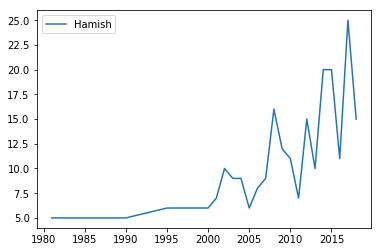

In [15]:
import matplotlib.pyplot as plt
for name in ['Hamish']:
    if name in name_year_frequency:
        x, y = zip(*sorted(name_year_frequency[name].items()))
        plt.plot(x, y, label=name)
        plt.legend();
plt.show();

In [16]:
# Which names have the biggest gap between homonyms?
sorted_gender_ratio = sorted(
    filter(
        lambda kv: kv[1]['popularity_rank'] < 200, \
        name_features.items()
    ), \
    key=lambda kv: (kv[1]['max_homonym_female_ratio'] - kv[1]['min_homonym_female_ratio'])
)[::-1]
sorted_gender_ratio[1::][:10]

[('Shirley',
  {'peak_year': 1935,
   'phonetic': ['SH', 'ER1', 'L', 'IY0'],
   'phoneme_count': 4,
   'homonyms': ['Shirley', 'Shirlee', 'Shirlie', 'Sherley', 'Shurley'],
   'homonym_count': 5,
   'popularity_rank': 80,
   'is_in_english_dictionary': False,
   'is_block_listed': False,
   'female_ratio': 0.9862562092406163,
   'min_homonym_female_ratio': 0.0,
   'max_homonym_female_ratio': 1.0}),
 ('Jerry',
  {'peak_year': 1947,
   'phonetic': ['JH', 'EH1', 'R', 'IY0'],
   'phoneme_count': 4,
   'homonyms': ['Jerry',
    'Gerry',
    'Jeri',
    'Jerrie',
    'Jerri',
    'Gerri',
    'Gerrie',
    'Jere',
    'Gery'],
   'homonym_count': 9,
   'popularity_rank': 90,
   'is_in_english_dictionary': True,
   'is_block_listed': False,
   'female_ratio': 0.027480586438762358,
   'min_homonym_female_ratio': 0.0,
   'max_homonym_female_ratio': 0.9968881566904632}),
 ('Joe',
  {'peak_year': 1936,
   'phonetic': ['JH', 'OW1'],
   'phoneme_count': 2,
   'homonyms': ['Jo', 'Joe', 'Joh'],
   'ho

In [17]:
[item for item in map(lambda x: 2*x, [1, 2, 3])]

[2, 4, 6]

In [18]:
sorted_gender_ratio = sorted(name_features.items(), key=lambda kv: kv[1]['female_ratio'])[::-1]
sorted_gender_ratio[1::][:10]

[('Litta',
  {'peak_year': 1889,
   'phonetic': '',
   'phoneme_count': 0,
   'homonyms': [],
   'homonym_count': 0,
   'popularity_rank': 84459,
   'is_in_english_dictionary': False,
   'is_block_listed': False,
   'female_ratio': 1.0,
   'min_homonym_female_ratio': 1.0,
   'max_homonym_female_ratio': 0.0}),
 ('Shauneille',
  {'peak_year': 1959,
   'phonetic': '',
   'phoneme_count': 0,
   'homonyms': [],
   'homonym_count': 0,
   'popularity_rank': 84472,
   'is_in_english_dictionary': False,
   'is_block_listed': False,
   'female_ratio': 1.0,
   'min_homonym_female_ratio': 1.0,
   'max_homonym_female_ratio': 0.0}),
 ('Sharalynn',
  {'peak_year': 1959,
   'phonetic': '',
   'phoneme_count': 0,
   'homonyms': [],
   'homonym_count': 0,
   'popularity_rank': 84473,
   'is_in_english_dictionary': False,
   'is_block_listed': False,
   'female_ratio': 1.0,
   'min_homonym_female_ratio': 1.0,
   'max_homonym_female_ratio': 0.0}),
 ('Ravonne',
  {'peak_year': 1959,
   'phonetic': '',
   '

In [19]:
sorted(name_features.items(), key=lambda kv:kv[1]['popularity_rank'])[:100]

[('James',
  {'peak_year': 1947,
   'phonetic': ['JH', 'EY1', 'M', 'Z'],
   'phoneme_count': 4,
   'homonyms': ['James'],
   'homonym_count': 1,
   'popularity_rank': 0,
   'is_in_english_dictionary': False,
   'is_block_listed': False,
   'female_ratio': 0.004510494963161753,
   'min_homonym_female_ratio': 0.004510494963161753,
   'max_homonym_female_ratio': 0.004510494963161753}),
 ('John',
  {'peak_year': 1947,
   'phonetic': ['JH', 'AA1', 'N'],
   'phoneme_count': 3,
   'homonyms': ['John', 'Jon', 'Jonn'],
   'homonym_count': 3,
   'popularity_rank': 1,
   'is_in_english_dictionary': True,
   'is_block_listed': True,
   'female_ratio': 0.004214702473988188,
   'min_homonym_female_ratio': 0.0,
   'max_homonym_female_ratio': 0.007464558277299383}),
 ('Robert',
  {'peak_year': 1947,
   'phonetic': ['R', 'AA1', 'B', 'ER0', 'T'],
   'phoneme_count': 5,
   'homonyms': ['Robert'],
   'homonym_count': 1,
   'popularity_rank': 2,
   'is_in_english_dictionary': False,
   'is_block_listed': T

In [ ]:
"abc"[::-1]

In [29]:
"lana"[::-1]

'anal'